<a href="https://colab.research.google.com/github/izaskunsas/Eurovision-List/blob/main/EDA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***EXPLORATORY DATA ANALYSIS***
## **SETTING THE SESSION**

In [ ]:
!python --version

Python 3.11.12


In [ ]:
pip list

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import os
from sklearn.preprocessing import RobustScaler

In [ ]:
file_dir = "/content/drive/MyDrive/THESIS/Code/data/"

##**DATA 2023**

In [ ]:
data_23 = pd.read_csv(file_dir + "male_players_23.csv")

In [ ]:
data_23.shape

In [ ]:
def filter_fifa_version(df, version=23):
    """
    Returns a DataFrame containing only rows where fifa_version equals the specified version.

    Parameters:
        df (pd.DataFrame): The original dataframe.
        version (int or str): The FIFA version to filter for (e.g., 23).

    Returns:
        pd.DataFrame: Filtered dataframe with only the specified version.
    """
    return df[df['fifa_version'] == version].copy()

In [ ]:
data_23 = filter_fifa_version(data_23, version=23)

In [ ]:
data_23['fifa_version'].value_counts()

In [ ]:
data_23.to_csv('male_players_ONLY_23.csv', index=False)

##**IMPORT DATA**

In [ ]:
data_15 = pd.read_csv(file_dir + "male_players_15.csv")
data_16 = pd.read_csv(file_dir + "male_players_16.csv")
data_17 = pd.read_csv(file_dir + "male_players_17.csv")
data_18 = pd.read_csv(file_dir + "male_players_18.csv")
data_19 = pd.read_csv(file_dir + "male_players_19.csv")
data_20 = pd.read_csv(file_dir + "male_players_20.csv")
data_21 = pd.read_csv(file_dir + "male_players_21.csv")
data_22 = pd.read_csv(file_dir + "male_players_22.csv")
data_23 = pd.read_csv(file_dir + "male_players_ONLY_23.csv")
data_24 = pd.read_csv(file_dir + "male_players_fc_24.csv")
data_25 = pd.read_csv(file_dir + "male_players_fc_25.csv")

<ipython-input-58-9112e53155e1>:2: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  data_15 = pd.read_csv(file_dir + "male_players_15.csv")
<ipython-input-58-9112e53155e1>:3: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  data_16 = pd.read_csv(file_dir + "male_players_16.csv")
<ipython-input-58-9112e53155e1>:5: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  data_18 = pd.read_csv(file_dir + "male_players_18.csv")
<ipython-input-58-9112e53155e1>:9: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data_22 = pd.read_csv(file_dir + "male_players_22.csv")


In [ ]:
def compare_columns(*dataframes):
  if not dataframes:
    return [],[]

  sets_columns = [set(df.columns) for df in dataframes]

  common = set.intersection(*sets_columns)

  all_col = set.union(*sets_columns)
  different = all_col - common

  column_loc = {col: [] for col in different}
  for i, df in enumerate(dataframes):
    for col in df.columns:
      if col in different:
        column_loc[col].append(f'Dataframe {i+1}')

  return list(common), list(different), column_loc


##**DATA CLEANING**
###DROP COLUMS

In [ ]:
#DROP COLUMNS -- STEP 1
def drop_columns(columns_to_drop, *dataframes):
  modified = [df.drop(columns=columns_to_drop, errors='ignore') for df in dataframes]
  return modified[0] if len(modified) == 1 else modified

columns_to_remove_15to22 = ["player_url", "value_eur", "wage_eur", "club_jersey_number", "club_jersey_number", "club_contract_valid_until", "nation_jersey_number", "international_reputation", "release_clause_eur",
                     "mentality_composure", "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes", "goalkeeping_speed", "club_logo_url",
                     "player_face_url", "club_flag_url", "club_team_id", "dob", "club_position", "club_loaned_from", "club_joined", "nationality_id", "nation_team_id", "nation_position", "work_rate",
                     "real_face", "body_type", "player_tags", "ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb",
                     "cb", "rcb", "rb", "gk", "nation_logo_url", "nation_flag_url", "player_traits", "long_name", 'sofifa_id']

columns_to_remove_23 = ["player_id", "player_url", "fifa_version", "fifa_update", "fifa_update_date", "long_name", "potential", "value_eur", "wage_eur", "dob", "league_id", "league_level", "club_team_id",
                        "club_position", "club_jersey_number", "club_joined_date", "club_loaned_from", "club_contract_valid_until_year", "nationality_id", "nation_team_id", "nation_position",
                        "nation_jersey_number", "international_reputation", "work_rate", "body_type", "real_face", "release_clause_eur", "player_tags", "player_traits", "mentality_composure",
                        "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes", "goalkeeping_speed", "ls", "st", "rs", "lw", "lf", "cf",
                        "rf", "rw", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb", "gk", "player_face_url"]

columns_to_remove_24 = ["alternative positions", "att work rate", "def work rate", "url", "GK Diving", "GK Handling", "GK Kicking", "GK Positioning", "GK Reflexes", "Gender"]
columns_to_remove_25 = ["Alternative positions", "url", "GK Diving", "GK Handling", "GK Kicking", "GK Positioning", "GK Reflexes","Rank", "play style"]


In [ ]:
data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22 = drop_columns(columns_to_remove_15to22, data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22)
data_23 = drop_columns(columns_to_remove_23, data_23)
data_24 = drop_columns(columns_to_remove_24, data_24)
data_25 = drop_columns(columns_to_remove_25, data_25)

###FEATURE MAPPING

In [ ]:
#COLUMN MAPPING -- STEP 2
def rename_columns(mapping_dict, *dataframes):
    data = [df.rename(columns=mapping_dict) for df in dataframes]
    return data

features_mapping = {
    'Age': 'age', #2025
    'OVR': 'overall', #2025
    'PAC': 'pace', #2024/2025
    'SHO': 'shooting', #2024/2025
    'PAS': 'passing', #2024/2025
    'DRI': 'dribbling', #2024/2025
    'DEF': 'defending', #2024/2025
    'PHY': 'physic', #2024/2025

    'movement_acceleration': 'acceleration', #2015-2023
    'Acceleration': 'acceleration', #2024/2025

    'movement_sprint_speed': 'sprint_speed', #2015-2023
    'Sprint Speed': 'sprint_speed', #2024/2025

    'mentality_positioning': 'positioning', #2015-2023
    'Positioning': 'positioning', #2024/2025

    'attacking_finishing': 'finishing', #2015-2023
    'Finishing': 'finishing', #2024/2025

    'power_shot_power': 'shot_power', #2015-2023
    'Shot Power': 'shot_power', #2024/2025

    'power_long_shots': 'long_shots', #2015-2023
    'Long Shots': 'long_shots', #2024/2025

    'attacking_volleys': 'volleys', #2015-2023
    'Volleys': 'volleys', #2024/2025

    'mentality_penalties': 'penalties', #2015-2023
    'Penalties': 'penalties', #2024/2025

    'mentality_vision': 'vision', #2015-2023
    'Vision': 'vision', #2024/2025

    'attacking_crossing': 'crossing', #2015-2023
    'Crossing': 'crossing', #2024/2025

    'skill_fk_accuracy': 'free_kick_accuracy', #2015-2023
    'Free Kick Accuracy': 'free_kick_accuracy', #2024/2025

    'attacking_short_passing': 'short_passing', #2015-2023
    'Short Passing': 'short_passing', #2024/2025

    'skill_long_passing': 'long_passing', #2015-2023
    'Long Passing': 'long_passing', #2024/2025

    'skill_curve': 'curve', #2015-2023
    'Curve': 'curve', #2024/2025

    'movement_agility': 'agility', #2015-2023
    'Agility': 'agility', #2024/2025

    'movement_balance': 'balance', #2015-2023
    'Balance': 'balance', #2024/2025

    'movement_reactions': 'reactions', #2015-2023
    'Reactions': 'reactions', #2024/2025

    'skill_ball_control': 'ball_control', #2015-2023
    'Ball Control': 'ball_control', #2024/2025

    #'skill_dribbling': 'dribbling', #2015-2023
    'Dribbling': 'skill_dribbling', #2024/2025

    'mentality_interceptions': 'interceptions', #2015-2023
    'Interceptions': 'interceptions', #2024/2025

    'attacking_heading_accuracy': 'heading_accuracy', #2015-2023
    'Heading Accuracy': 'heading_accuracy', #2024/2025

    'defending_marking_awareness': 'defense_awareness', #2015-2023
    'Def Awareness': 'defense_awareness', #2024/2025

    'defending_standing_tackle': 'standing_tackle', #2015-2023
    'Standing Tackle': 'standing_tackle', #2024/2025

    'defending_sliding_tackle': 'sliding_tackle', #2015-2023
    'Sliding Tackle': 'sliding_tackle', #2024/2025

    'power_jumping': 'jumping', #2015-2023
    'Jumping': 'jumping', #2024/2025

    'power_stamina': 'stamina', #2015-2023
    'Stamina': 'stamina', #2024/2025

    'power_strength': 'strength', #2015-2023
    'Strength': 'strength', #2024/2025

    'mentality_aggression': 'aggression', #2015-2023
    'Aggression': 'aggression', #2024/2025

    'height_cm': 'height', #2015-2023
    'Height': 'height', #2025

    'weight_kg': 'weight', #2015-2023
    'Weight': 'weight', #2025

    'league_name': 'league', #2015-2023
    'League': 'league', #2025

    'player_positions': 'position', #2015-2023
    'Position': 'position', #2025

    'Weak foot': 'weak_foot', #2025
    'weak foot': 'weak_foot', #2024

    'Skill moves': 'skill_moves', #2025
    'skill moves': 'skill_moves', #2024

    'Preferred foot': 'preferred_foot', #2025
    'preferred foot': 'preferred_foot', #2024

    'club_name': 'team', #2015-2023
    'club': 'team', #2024
    'Team': 'team', #2025

    'nationality_name':'nation', #2015-2023
    'Nation':'nation', #2025

    'short_name':'name', #2015-2023
    'Name':'name' #2025
}

In [ ]:
data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22, data_23, data_24, data_25 = rename_columns(features_mapping, data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22, data_23, data_24, data_25)

In [ ]:
common, different, locations = compare_columns(data_15, data_17, data_19, data_21, data_24, data_25)
print(common)
print(len(common))

['skill_dribbling', 'reactions', 'position', 'weight', 'finishing', 'long_passing', 'agility', 'skill_moves', 'sprint_speed', 'acceleration', 'sliding_tackle', 'vision', 'strength', 'physic', 'pace', 'penalties', 'shooting', 'free_kick_accuracy', 'shot_power', 'volleys', 'passing', 'league', 'preferred_foot', 'curve', 'stamina', 'positioning', 'jumping', 'age', 'standing_tackle', 'aggression', 'weak_foot', 'defending', 'name', 'ball_control', 'heading_accuracy', 'dribbling', 'interceptions', 'crossing', 'team', 'height', 'nation', 'long_shots', 'short_passing', 'balance', 'defense_awareness', 'overall']
46


###STANDARDIZE HEIGHT & WEIGHT

In [ ]:
# FIX HEIGHT & WEIGHT -- STEP 3
def clean_columns(columns, *dataframes):
    if len(dataframes) == 1 and isinstance(dataframes[0], pd.DataFrame):
      dataframes = [dataframes[0]]

    for df in dataframes:
      for column in columns:
          if column in df.columns:
              df[column] = df[column].astype(str).apply(
                  lambda x: float(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else None
              )
    return dataframes[0] if len(dataframes) == 1 else dataframes

In [ ]:
cleaned_dfs = clean_columns(['height', 'weight'], data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22, data_23, data_24, data_25)
data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22, data_23, data_24, data_25 = cleaned_dfs

### EUROPEAN LEAGUES

In [ ]:
# EUROPEAN LEAGUES -- STEP 4
def european_leagues(league_mapping, column='league', *dataframes):
    if len(dataframes) == 1 and isinstance(dataframes[0], pd.DataFrame):
      dataframes = [dataframes[0]]
    for df in dataframes:
      df[column] = df[column].map(league_mapping)
      df.dropna(subset=[column], inplace=True)

    return dataframes[0] if len(dataframes) == 1 else dataframes

# EU leagues that appear in at least 75% in the datasets (7/11)
league_mapping = {
    'English Premier League': 'english_premier_league', #2015-2023
    'Premier League': 'english_premier_league', #2024/2025

    'Spain Primera Division': 'spain_la_liga', #2015-2022
    'La Liga': 'spain_la_liga', #2023
    'LALIGA EA SPORTS': 'spain_la_liga', #2024/2025

    'Italian Serie A': 'italy_serie_a', #2015-2022
    'Serie A': 'italy_serie_a', #2023
    'Serie A TIM': 'italy_serie_a', #2024
    'Serie A Enilive': 'italy_serie_a', #2025

    'French Ligue 1': 'france_ligue_1', #2015-2022
    'Ligue 1': 'france_ligue_1', #2023
    'Ligue 1 Uber Eats': 'france_ligue_1', #2024
    "Ligue 1 McDonald's":'france_ligue_1', #2025

    'German 1. Bundesliga': 'german_bundesliga', #2015-2022
    'Bundesliga': 'german_bundesliga', #2023/2024/2025

    'Polish T-Mobile Ekstraklasa': 'poland_league', #2015-2022
    'Ekstraklasa': 'poland_league', #2023
    'PKO BP Ekstraklasa': 'poland_league', #2025

    'Holland Eredivisie': 'nl_eredivisie', #2015-2022
    'Eredivisie': 'nl_eredivisie', #2023/2025

    'Portuguese Liga ZON SAGRES': 'portugal_liga', #2015-2022
    'Liga Portugal': 'portugal_liga', #2023/2025

    'Belgian Jupiler Pro League': 'belgium_league', #2015-2022
    'Jupiler Pro League': 'belgium_league', #2023
    '1A Pro League': 'belgium_league', #2025

    'Norwegian Eliteserien':'norway_league', #2015-2022
    'Eliteserien': 'norway_league', #2023/2025

    'Swedish Allsvenskan': 'sweden_league', #2015-2022
    'Allsvenskan': 'sweden_league', #2023/2025

    'Danish Superliga': 'denmark_superliga', #2015-2022
    'Superliga': 'denmark_superliga', #2023
    '3F Superliga': 'denmark_superliga', #2025

    'Austrian Football Bundesliga': 'austria_bundesliga', #2015-2022
    'Ö. Bundesliga': 'austria_bundesliga', #2025

    'Swiss Super League': 'switzerland_league', #2015-2022
    'CSSL': 'switzerland_league', #2025

    'Scottish Premiership': 'scotland_prem', #2015-2022
    'Premiership': 'scotland_prem', #2023
    'Scottish Prem': 'scotland_prem', #2025

    'Rep. Ireland Airtricity League': 'ireland_league', #2015-2022
    'Premier Division': 'ireland_league', #2023
    'SSE Airtricity PD': 'ireland_league', #2025

    'Greek Super League': 'greece_league', #2015-2022
    'Hellas Liga': 'greece_league', #2025

    'Czech Republic Gambrinus Liga': 'czechia_league', #2015-2022
    'Fortuna Liga': 'czechia_league', #2023
    'Česká Liga': 'czechia_league', #2025

    'Finnish Veikkausliiga': 'finland_league', #2015-2022
    'Veikkausliiga': 'finland_league', #2023
    'Finnliiga': 'finland_league', #2025

    'Ukrainian Premier League': 'ukraine_league', #2015-2022
    'Ukrayina Liha': 'ukraine_league', #2025
}

In [ ]:
cleaned_dfs = european_leagues(league_mapping,'league', data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22, data_23, data_24, data_25)
data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22, data_23, data_24, data_25 = cleaned_dfs

### REMOVE GOALKEEPERS

In [ ]:
# REMOVE GK
def remove_goalkeepers(*dataframes):
    if len(dataframes) == 1 and isinstance(dataframes[0], pd.DataFrame):
        dataframes = [dataframes[0]]

    data = [df[df['position'] != 'GK'] if 'position' in df.columns else df for df in dataframes]

    return data[0] if len(data) == 1 else data

In [ ]:
data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22, data_23, data_24, data_25 = remove_goalkeepers(data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22, data_23, data_24, data_25)

In [ ]:
data = pd.concat([data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22, data_23, data_24, data_25], keys=['FIFA 15', 'FIFA 16', 'FIFA 17', 'FIFA 18', 'FIFA 19', 'FIFA 20', 'FIFA 21', 'FIFA 22', 'FIFA 23', 'FC 24', 'FC 25'])

###REPEATED INSTANCES

In [ ]:
def deduplicate_all_names_per_key(data):
    deduped_parts = []

    # Loop through each key (first level of MultiIndex)
    for key in data.index.levels[0]:
        group = data.loc[key]
        seen = set()
        deduped_rows = []

        for idx, row in group.iterrows():
            name = row['name']
            if name not in seen:
                seen.add(name)
                deduped_rows.append((idx, row))
            # else: skip the duplicate

        # Rebuild with MultiIndex
        part = pd.DataFrame(
            [r for _, r in deduped_rows],
            index=pd.MultiIndex.from_tuples(
                [(key, idx) for idx, _ in deduped_rows],
                names=data.index.names
            )
        )
        deduped_parts.append(part)

    # Combine and sort the final result
    final_data = pd.concat(deduped_parts).sort_index()
    return final_data

In [ ]:
data_clean = deduplicate_all_names_per_key(data)

In [ ]:
data_clean = data_clean.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Composure'], axis =1)
data_clean = data_clean.drop(["potential", "league_level"], axis=1)

##**DATA OVERVIEW**

In [ ]:
#DATA OVERVIEW
data_clean.head()
data_clean = data_clean.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Composure'], axis =1)

data_clean.shape
# (63879, 46)

data_clean.describe()

data_clean.dtypes
# object - 6
# int64 - 32
# float - 10 (including potential, league_level which are NaN in 23,24,25)

data_clean[data_clean.duplicated()]

data_clean.isna().sum()
# potential & league_level have 64875 NaN, the rest is good :)
data_clean.isna().sum().sum()
# np.int64(129750)

data_clean = data_clean.drop(["potential", "league_level"], axis=1)

round(data_clean.isna().sum().sum()/ data_clean.size *100, 1) # 0 :)

###FEATURE ASSESMENT

In [ ]:
#FEATURE ASSESMENT - done by chatGPT (not used)
def analyze_features(df, target_dir='/content/drive/MyDrive/THESIS/Code/plots/EDA/', max_categories=20):
    os.makedirs(target_dir, exist_ok=True)

    numeric_features = df.select_dtypes(include=[np.number]).columns
    categorical_features = df.select_dtypes(exclude=[np.number]).columns

    print("=== Numeric Features Analysis ===")
    for col in numeric_features:
        print(f"\nFeature: {col}")
        series = df[col].dropna()

        # Summary stats
        stats = {
            'Mean': series.mean(),
            'Std': series.std(),
            'Skewness': series.skew(),
            'Kurtosis': series.kurtosis(),
            'Min': series.min(),
            '25%': series.quantile(0.25),
            'Median': series.median(),
            '75%': series.quantile(0.75),
            'Max': series.max(),
        }

        for k, v in stats.items():
            print(f"{k}: {v:.4f}")

        # Outlier detection using IQR
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()
        print(f"Outliers (IQR method): {outliers}")

        # Histogram
        plt.figure(figsize=(8, 5))
        sns.histplot(series, kde=True, bins=30, color='skyblue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.savefig(f"{target_dir}/hist_{col}.png")
        plt.close()

    print("\n=== Correlation Heatmap (Numeric Features) ===")
    if len(numeric_features) >= 2:
        corr = df[numeric_features].corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
        plt.title('Correlation Heatmap')
        plt.savefig(f"{target_dir}/correlation_heatmap.png")
        plt.close()
        print("Correlation heatmap saved.")
    else:
        print("Not enough numeric features to generate heatmap.")

    print("\n=== Categorical Features Analysis ===")
    for col in categorical_features:
        print(f"\nFeature: {col}")
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else "None"
        freq_table = df[col].value_counts(dropna=False).head(max_categories)

        print(f"Mode: {mode}")
        print("Top Frequencies:")
        print(freq_table)

        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, y=col, order=freq_table.index, palette='viridis')
        plt.title(f'Bar Plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.savefig(f"{target_dir}/bar_{col}.png")
        plt.close()

In [ ]:
analyze_features(data_clean)

#Problems I see: some names seem to be wayy mor there

=== Numeric Features Analysis ===

Feature: overall
Mean: 67.7249
Std: 7.6744
Skewness: 0.0114
Kurtosis: -0.3188
Min: 40.0000
25%: 63.0000
Median: 68.0000
75%: 73.0000
Max: 94.0000
Outliers (IQR method): 212

Feature: age
Mean: 24.5387
Std: 4.4076
Skewness: 0.4315
Kurtosis: -0.4473
Min: 16.0000
25%: 21.0000
Median: 24.0000
75%: 28.0000
Max: 42.0000
Outliers (IQR method): 53

Feature: height
Mean: 181.3668
Std: 6.2655
Skewness: -0.0289
Kurtosis: -0.2653
Min: 154.0000
25%: 177.0000
Median: 181.0000
75%: 186.0000
Max: 206.0000
Outliers (IQR method): 154

Feature: weight
Mean: 74.9303
Std: 6.6146
Skewness: 0.1985
Kurtosis: 0.0716
Min: 49.0000
25%: 70.0000
Median: 75.0000
75%: 79.0000
Max: 104.0000
Outliers (IQR method): 498

Feature: weak_foot
Mean: 3.0418
Std: 0.6526
Skewness: 0.2628
Kurtosis: 0.5622
Min: 1.0000
25%: 3.0000
Median: 3.0000
75%: 3.0000
Max: 5.0000
Outliers (IQR method): 23563

Feature: skill_moves
Mean: 2.5700
Std: 0.6654
Skewness: 0.8482
Kurtosis: 0.0124
Min: 2.0000
25%: 2

<ipython-input-20-201e518280c5>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=freq_table.index, palette='viridis')



Feature: position
Mode: CB
Top Frequencies:
position
CB         9638
ST         7284
CM         3864
LB         3056
RB         2782
CDM, CM    2550
CM, CDM    2387
CDM        1607
CAM        1323
RM         1227
LM         1216
CB, RB      870
CAM, CM     800
LM, RM      755
CM, CAM     742
RM, LM      721
CB, LB      681
CB, CDM     674
RW          644
LW          603
Name: count, dtype: int64


<ipython-input-20-201e518280c5>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=freq_table.index, palette='viridis')



Feature: team
Mode: Chelsea
Top Frequencies:
team
Chelsea              298
Leicester City       296
Southampton          294
Liverpool            292
Arsenal              292
Everton              291
Crystal Palace       287
Manchester City      284
FC Augsburg          280
TSG Hoffenheim       274
Real Sociedad        274
FC Barcelona         273
VfL Wolfsburg        270
Borussia Dortmund    270
West Ham United      268
Manchester United    260
Tottenham Hotspur    260
Fiorentina           259
Sporting CP          256
Lazio                254
Name: count, dtype: int64


<ipython-input-20-201e518280c5>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=freq_table.index, palette='viridis')



Feature: league
Mode: english_premier_league
Top Frequencies:
league
english_premier_league    5917
italy_serie_a             5483
spain_la_liga             5385
german_bundesliga         5032
france_ligue_1            5017
portugal_liga             4277
nl_eredivisie             4151
belgium_league            3916
poland_league             3802
norway_league             3458
sweden_league             3455
denmark_superliga         2877
scotland_prem             2823
ireland_league            2279
austria_bundesliga        2279
switzerland_league        2116
greece_league              711
czechia_league             449
ukraine_league             289
finland_league             163
Name: count, dtype: int64


<ipython-input-20-201e518280c5>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=freq_table.index, palette='viridis')



Feature: nation
Mode: France
Top Frequencies:
nation
France                 4440
Spain                  4421
England                3100
Sweden                 3032
Norway                 2915
Netherlands            2895
Germany                2867
Brazil                 2702
Poland                 2688
Denmark                2568
Portugal               2531
Italy                  2377
Republic of Ireland    2246
Belgium                2200
Austria                2148
Scotland               1741
Switzerland            1433
Argentina               939
Serbia                  758
Nigeria                 712
Name: count, dtype: int64


<ipython-input-20-201e518280c5>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=freq_table.index, palette='viridis')



Feature: preferred_foot
Mode: Right
Top Frequencies:
preferred_foot
Right    47478
Left     16401
Name: count, dtype: int64


<ipython-input-20-201e518280c5>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=freq_table.index, palette='viridis')


##**SCALING**

In [ ]:
data_clean.to_csv("/content/drive/MyDrive/THESIS/Code/data/data_CLEAN")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/THESIS/Code/data/data_CLEAN")
data = data.drop(data.columns[1], axis = 1)

In [ ]:
#THE DATA NEEDS SOME TWEKING & PREP
data = data.rename(columns={"Unnamed: 0": "Year"})

In [ ]:
#SCALE
numerical_columns = data.select_dtypes(exclude=['object']).columns

non_scalable_numericals = ['weight', 'height', 'age']

scale_columns = [col for col in numerical_columns if col not in non_scalable_numericals]

scaler = RobustScaler()
data[scale_columns] = scaler.fit_transform(data[scale_columns])

data[scale_columns] = np.tanh(data[scale_columns])

In [ ]:
data['preferred_foot'] = data['preferred_foot'].replace({'Right': 1, 'Left': -1})

<ipython-input-80-ce9755bd7a29>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['preferred_foot'] = data['preferred_foot'].replace({'Right': 1, 'Left': -1})


##**EXPLORATORY DATA ANALYSIS**

In [ ]:
data.to_csv("/content/drive/MyDrive/THESIS/Code/data/data_FINAL")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/THESIS/Code/data/data_FINAL", index_col=0)

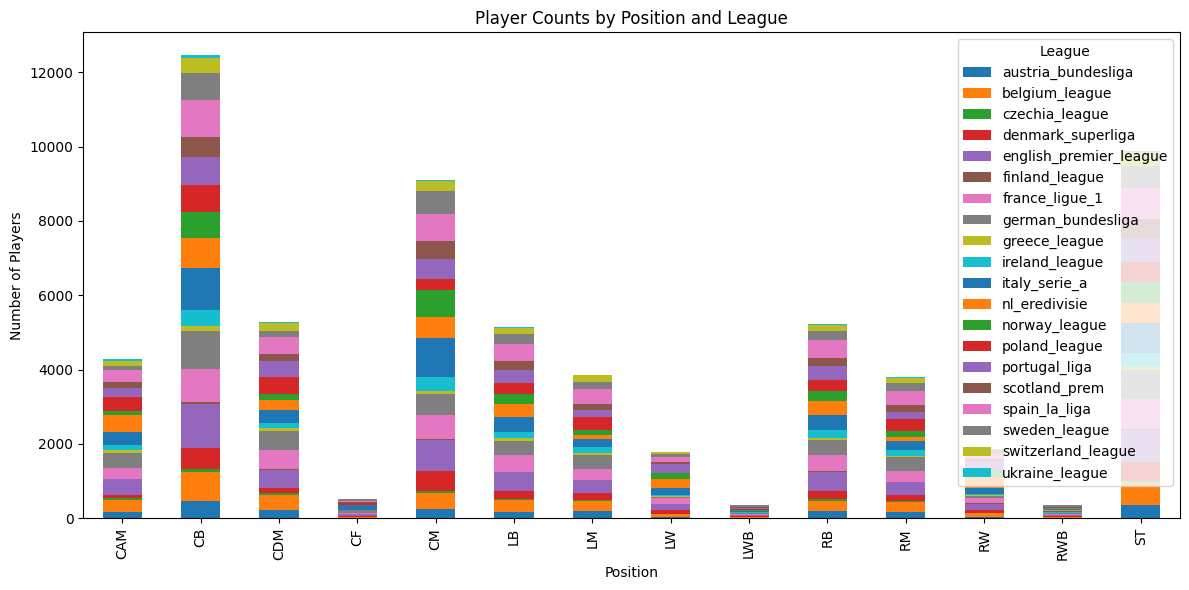

In [ ]:
df['primary_position'] = df['position'].str.split(',').str[0]


position_league_counts = df.groupby(['primary_position', 'league']).size().unstack(fill_value=0)


position_league_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Player Counts by Position and League')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.legend(title='League')
plt.tight_layout()
plt.show()

<ipython-input-5-f3eb4d1c25d1>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='League', bbox_to_anchor=(1.05, 1), loc='upper left')


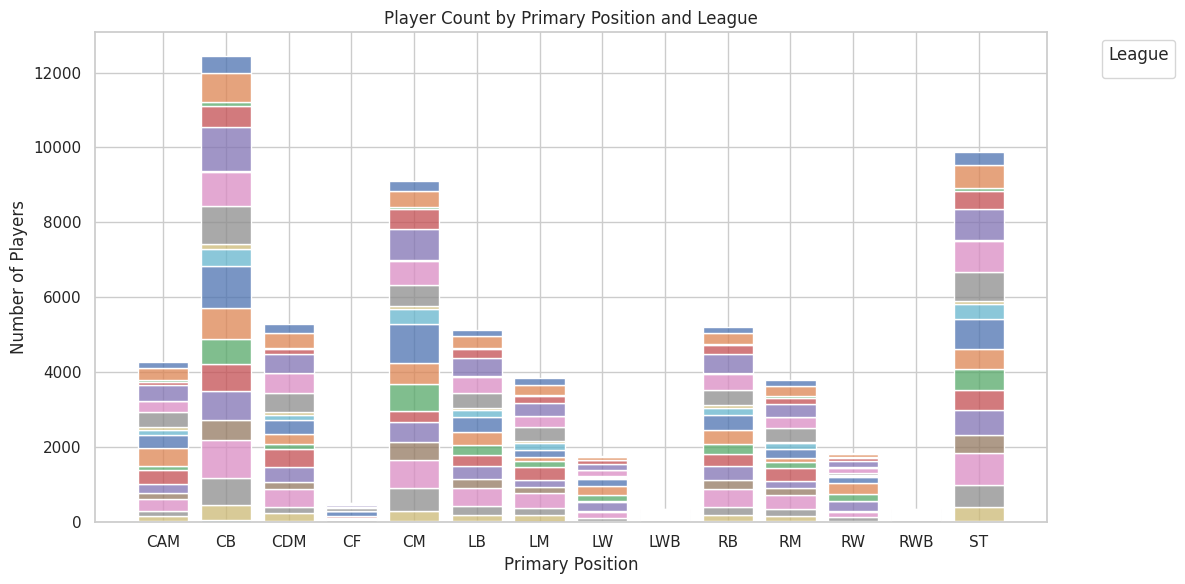

In [ ]:
df['primary_position'] = df['position'].str.split(',').str[0]

# Group by primary position & league
counts = df.groupby(['primary_position', 'league']).size().reset_index(name='count')


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=counts,
    x='primary_position',
    weights='count',
    hue='league',
    multiple='stack',
    shrink=0.8,
    palette='deep'
)

plt.title('Player Count by Primary Position and League')
plt.xlabel('Primary Position')
plt.ylabel('Number of Players')
plt.legend(title='League', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-10-ec9a32607463>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(filtered.columns))


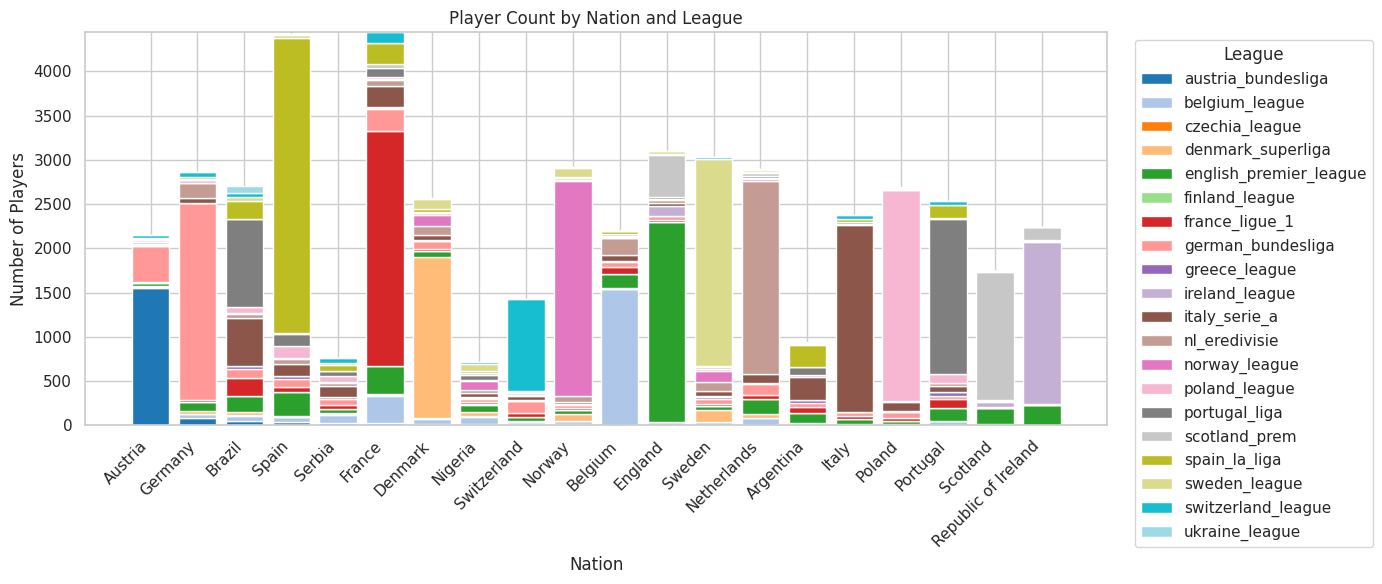

In [ ]:
# Group nation & league
nation_league_counts = df.groupby(['nation', 'league']).size().unstack(fill_value=0)

top_nations = nation_league_counts.sum(axis=1).nlargest(20).index
filtered = nation_league_counts.loc[top_nations]

filtered.sort_values(by=filtered.columns.tolist(), ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(14, 6))

bottom = [0] * len(filtered)
colors = plt.cm.get_cmap('tab20', len(filtered.columns))

for i, league in enumerate(filtered.columns):
    ax.bar(filtered.index, filtered[league], bottom=bottom, label=league, color=colors(i))
    bottom = bottom + filtered[league].values

ax.set_title('Player Count by Nation and League')
ax.set_xlabel('Nation')
ax.set_ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
ax.legend(title='League', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


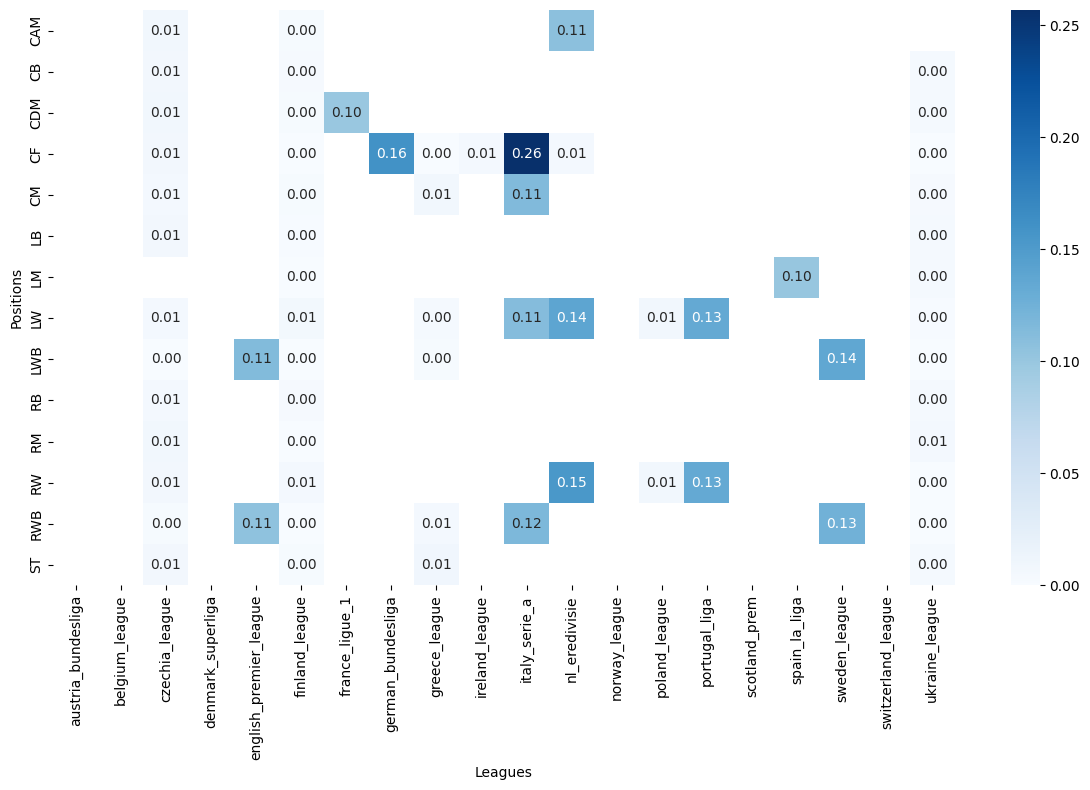

In [ ]:
df['primary_position'] = df['position'].str.split(',').str[0]

position_league_counts = df.groupby(['primary_position', 'league']).size().unstack(fill_value=0)

# Normalize by row (i.e., by position): shows % distribution across leagues for each position -- chatGPT recommendation
normalized = position_league_counts.div(position_league_counts.sum(axis=1), axis=0)

# thresholding – filter to only show cells with values above 0.25 (25%)
thresholded = normalized.where((normalized < 0.01) | (normalized > 0.1))

plt.figure(figsize=(12, 8))
sns.heatmap(thresholded, annot=True, fmt=".2f", cmap='Blues', cbar=True)

plt.xlabel('Leagues')
plt.ylabel('Positions')
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/THESIS/Code/plots/EDA/Players Primary Positions per league.png")
plt.show()
plt.close()



In [ ]:
print(position_league_counts)

league            austria_bundesliga  belgium_league  czechia_league  \
primary_position                                                       
CAM                              178             320              35   
CB                               450             794              89   
CDM                              232             391              44   
CF                                11              28               4   
CM                               255             431              48   
LB                               176             310              37   
LM                               184             267              39   
LW                                32              75               9   
LWB                               13              16               0   
RB                               184             292              28   
RM                               156             272              31   
RW                                38              94            

In [ ]:
df.head()

,Year,name,position,overall,age,height,weight,team,league,nation,...,long_shots,aggression,interceptions,positioning,vision,penalties,defense_awareness,standing_tackle,sliding_tackle,primary_position
0,FC 24,Kylian Mbappé,ST,0.980096,25,182.0,75.0,Paris SG,france_ligue_1,France,...,0.809301,0.049958,-0.532587,0.945705,0.870062,0.926286,-0.747710,-0.639647,-0.626294,ST
1,FC 24,Erling Haaland,ST,0.980096,24,195.0,94.0,Manchester City,english_premier_league,Norway,...,0.848284,0.833655,-0.411570,0.960114,0.682262,0.926286,-0.523134,-0.348413,-0.676986,ST
2,FC 24,Kevin De Bruyne,CM,0.980096,33,181.0,75.0,Manchester City,english_premier_league,Belgium,...,0.905148,0.537050,0.274062,0.909792,0.964028,0.918437,0.311838,0.321513,-0.117107,CM
3,FC 24,Harry Kane,ST,0.975743,31,188.0,89.0,FC Bayern München,german_bundesliga,England,...,0.859562,0.691069,-0.437189,0.950997,0.914697,0.967563,-0.311838,-0.374751,-0.507104,ST
4,FC 24,Robert Lewandowski,ST,0.975743,36,185.0,81.0,FC Barcelona,spain_la_liga,Poland,...,0.823201,0.716298,-0.244919,0.950997,0.840308,0.960114,-0.589839,-0.473949,-0.806749,ST


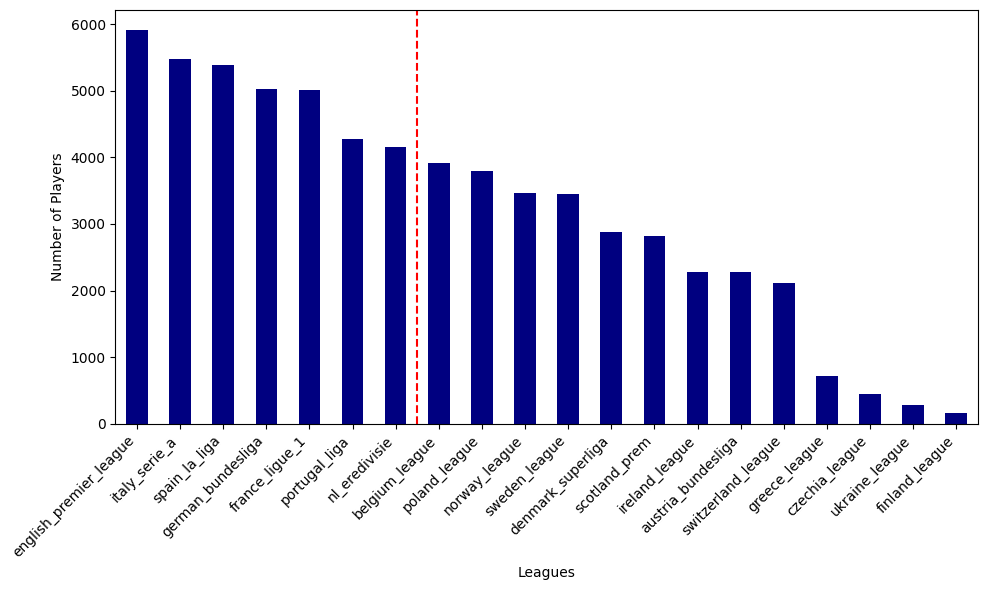

In [ ]:
os.makedirs('/content/drive/MyDrive/THESIS/Code/plots/EDA/', exist_ok=True)

league_counts = df['league'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
league_counts.plot(kind='bar', color='navy')
plt.axvline(x=6.5, color='red', linestyle='--', linewidth=1.5)

plt.xlabel('Leagues')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/THESIS/Code/plots/EDA/League Counts.png")
plt.show()
plt.close()
